# ADS 507 Final Project

In [1]:
import pandas as pd  # For handling datasets
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For better visualizations


In [3]:
# Load Emergency Department Visit Data
er_data = pd.read_csv("encounters-by-facility_2012-2023_20240702.csv")

# Load Low-Income Community Data
income_data = pd.read_csv("Low-Income_or_Disadvantaged_Communities_Designated_by_California.csv")

# Display the first few rows of each dataset
er_data.head(), income_data.head()


(   year   oshpd_id     facility_name county_name er_service_level_desc  \
 0  2012  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
 1  2012  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
 2  2013  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
 3  2013  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
 4  2014  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
 
        type    count  
 0  ED_Admit   2595.0  
 1  ED_Visit  13727.0  
 2  ED_Admit   2579.0  
 3  ED_Visit  13538.0  
 4  ED_Admit   2214.0  ,
    OBJECTID_1  STATEFP  COUNTYFP  TRACTCE       GEOID    NAME  \
 0           1        6        37   204920  6037204920  2049.2   
 1           2        6        37   205110  6037205110  2051.1   
 2           3        6        37   205120  6037205120  2051.2   
 3           4        6        37   206010  6037206010  2060.1   
 4           5        6        37   206050  6037206050  2060.5   
 
     

In [5]:
# Check structure of the Emergency Department Visit Data
print("Emergency Data Info:")
print(er_data.info())

# Check structure of the Low-Income Community Data
print("\nLow-Income Community Data Info:")
print(income_data.info())


Emergency Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   7846 non-null   int64  
 1   oshpd_id               7846 non-null   int64  
 2   facility_name          7846 non-null   object 
 3   county_name            7846 non-null   object 
 4   er_service_level_desc  7680 non-null   object 
 5   type                   7846 non-null   object 
 6   count                  7748 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 429.2+ KB
None

Low-Income Community Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4738 entries, 0 to 4737
Data columns (total 96 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID_1          4738 non-null   int64  
 1   STATEFP             4738 non-null   int64  


In [7]:
print("Missing Values in Emergency Data:")
print(er_data.isnull().sum())

print("\nMissing Values in Income Data:")
print(income_data.isnull().sum())


Missing Values in Emergency Data:
year                       0
oshpd_id                   0
facility_name              0
county_name                0
er_service_level_desc    166
type                       0
count                     98
dtype: int64

Missing Values in Income Data:
OBJECTID_1             0
STATEFP                0
COUNTYFP               0
TRACTCE                0
GEOID                  0
                    ... 
State_MHI_Percent    233
Income_Group         224
DAC_and_or_LIC         0
Shape__Area            0
Shape__Length          0
Length: 96, dtype: int64


In [9]:
# Summary statistics for Emergency Department Data
print("Emergency Data Summary:")
print(er_data.describe())

# Summary statistics for Low-Income Data
print("\nIncome Data Summary:")
print(income_data.describe())


Emergency Data Summary:
              year      oshpd_id          count
count  7846.000000  7.846000e+03    7748.000000
mean   2017.456029  1.062816e+08   21356.866804
std       3.446954  1.370205e+05   23951.765042
min    2012.000000  1.060107e+08       1.000000
25%    2014.000000  1.061904e+08    4223.250000
50%    2017.000000  1.063012e+08   10924.000000
75%    2020.000000  1.063712e+08   32401.750000
max    2023.000000  1.065810e+08  146799.000000

Income Data Summary:
        OBJECTID_1  STATEFP     COUNTYFP        TRACTCE         GEOID  \
count  4738.000000   4738.0  4738.000000    4738.000000  4.738000e+03   
mean   2369.500000      6.0    52.830730  201049.846349  6.053032e+09   
std    1367.887118      0.0    25.793992  234447.614128  2.570870e+07   
min       1.000000      6.0     1.000000     100.000000  6.001401e+09   
25%    1185.250000      6.0    37.000000    7603.250000  6.037222e+09   
50%    2369.500000      6.0    41.000000   99225.500000  6.041128e+09   
75%    3553

In [11]:
# Check unique values for some key categorical columns
print("Unique Facilities in ER Data:", er_data["facility_name"].nunique())
print("Unique Counties in ER Data:", er_data["county_name"].nunique())  # Using county_name instead of ZIP Code

# Display unique values for important categorical columns
print("\nUnique Service Levels in ER Data:", er_data["er_service_level_desc"].unique()[:10])  # Show first 10 unique values


Unique Facilities in ER Data: 428
Unique Counties in ER Data: 55

Unique Service Levels in ER Data: ['BASIC' nan 'STANDBY' 'COMPREHENSIVE']


In [13]:
# Check for duplicates
print("Duplicate rows in Emergency Data:", er_data.duplicated().sum())
print("Duplicate rows in Income Data:", income_data.duplicated().sum())

# Remove duplicates if needed
er_data = er_data.drop_duplicates()
income_data = income_data.drop_duplicates()


Duplicate rows in Emergency Data: 0
Duplicate rows in Income Data: 0


In [15]:
# Check common columns
print("ER Data Columns:", er_data.columns)
print("Income Data Columns:", income_data.columns)

# Merge datasets on county_name (ER) and County (Income)
merged_data = er_data.merge(income_data, left_on="county_name", right_on="County", how="left")

# Preview merged dataset
merged_data.head()


ER Data Columns: Index(['year', 'oshpd_id', 'facility_name', 'county_name',
       'er_service_level_desc', 'type', 'count'],
      dtype='object')
Income Data Columns: Index(['OBJECTID_1', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Tract', 'Tract_Area', 'tract_t', 'Lat', 'Long', 'OBJECTID',
       'Tract_1', 'ZIP', 'Population', 'CIscore', 'CIscoreP', 'Ozone',
       'Ozone_Pctl', 'PM2_5', 'PM2_5_Pctl', 'Diesel_PM', 'Diesel_PM_Pctl',
       'Pesticides', 'Pesticides_Pctl', 'Tox_Releases', 'Tox_Releases_Pctl',
       'Traffic', 'Traffic_Pctl', 'Drinking_Water', 'DrinkingWaterPctl',
       'Lead', 'Lead_Pctl', 'Cleanups', 'Cleanups_Pctl', 'GroundwaterThreats',
       'GW_Threats_Pctl', 'Haz_Waste', 'Haz_Waste_Pctl', 'Imp_Water_Bodies',
       'ImpWaterBodPctl', 'Solid_Waste', 'Solid_Waste_Pctl', 'Pollution',
       'PollutionScore', 'Pollution_Pctl', 'Asthma', 'Asthma_Pctl',
       'Low_Bi

year   oshpd_id     facility_name county_name er_service_level_desc  \
0  2012  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
1  2012  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
2  2013  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
3  2013  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
4  2014  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   

       type    count  OBJECTID_1  STATEFP  COUNTYFP  ...  MHI_2019_5YR  \
0  ED_Admit   2595.0         NaN      NaN       NaN  ...           NaN   
1  ED_Visit  13727.0         NaN      NaN       NaN  ...           NaN   
2  ED_Admit   2579.0         NaN      NaN       NaN  ...           NaN   
3  ED_Visit  13538.0         NaN      NaN       NaN  ...           NaN   
4  ED_Admit   2214.0         NaN      NaN       NaN  ...           NaN   

   Avg_hshld_size  HCD_Low_2021 HCD_Moderate_2021 State_MHI_2019  \
0             NaN           NaN               NaN            NaN   
1             NaN           NaN               NaN            NaN   
2             NaN           NaN               NaN            NaN   
3             NaN           NaN               NaN            NaN   
4             NaN           NaN               NaN            NaN   

  State_MHI_Percent  Income_Group  DAC_and_or_LIC  Shape__Area  Shape__Length  
0               NaN           NaN             NaN          NaN            NaN  
1               NaN           NaN             NaN          NaN            NaN  
2               NaN           NaN             NaN          NaN            NaN  
3               NaN           NaN             NaN          NaN            NaN  
4               NaN           NaN             NaN          NaN            NaN  

[5 rows x 103 columns]

## After the data merge there seems to be a mis match since they both dont overlap on zipcode. I am going to work on finding how to make sure the merge is more successful to gain all the right data

In [17]:
# Count missing values in key columns after merging
missing_counties = merged_data[merged_data["MHI_2019_5YR"].isna()]["county_name"].unique()
print("Counties in ER data that did not match in Income data:", missing_counties)


Counties in ER data that did not match in Income data: ['ALAMEDA' 'AMADOR' 'BUTTE' 'CALAVERAS' 'COLUSA' 'CONTRA COSTA'
 'DEL NORTE' 'EL DORADO' 'FRESNO' 'GLENN' 'HUMBOLDT' 'IMPERIAL' 'INYO'
 'KERN' 'KINGS' 'LAKE' 'LASSEN' 'LOS ANGELES' 'MADERA' 'MARIN' 'MARIPOSA'
 'MENDOCINO' 'MERCED' 'MODOC' 'MONO' 'MONTEREY' 'NAPA' 'NEVADA' 'ORANGE'
 'PLACER' 'PLUMAS' 'RIVERSIDE' 'SACRAMENTO' 'SAN BENITO' 'SAN BERNARDINO'
 'SAN DIEGO' 'SAN FRANCISCO' 'SAN JOAQUIN' 'SAN LUIS OBISPO' 'SAN MATEO'
 'SANTA BARBARA' 'SANTA CLARA' 'SANTA CRUZ' 'SHASTA' 'SISKIYOU' 'SOLANO'
 'SONOMA' 'STANISLAUS' 'TEHAMA' 'TRINITY' 'TULARE' 'TUOLUMNE' 'VENTURA'
 'YOLO' 'YUBA']


In [19]:
# Get county names from both datasets
print("Counties in ER Data:", er_data["county_name"].unique())
print("\nCounties in Income Data:", income_data["County"].unique())


Counties in ER Data: ['ALAMEDA' 'AMADOR' 'BUTTE' 'CALAVERAS' 'COLUSA' 'CONTRA COSTA'
 'DEL NORTE' 'EL DORADO' 'FRESNO' 'GLENN' 'HUMBOLDT' 'IMPERIAL' 'INYO'
 'KERN' 'KINGS' 'LAKE' 'LASSEN' 'LOS ANGELES' 'MADERA' 'MARIN' 'MARIPOSA'
 'MENDOCINO' 'MERCED' 'MODOC' 'MONO' 'MONTEREY' 'NAPA' 'NEVADA' 'ORANGE'
 'PLACER' 'PLUMAS' 'RIVERSIDE' 'SACRAMENTO' 'SAN BENITO' 'SAN BERNARDINO'
 'SAN DIEGO' 'SAN FRANCISCO' 'SAN JOAQUIN' 'SAN LUIS OBISPO' 'SAN MATEO'
 'SANTA BARBARA' 'SANTA CLARA' 'SANTA CRUZ' 'SHASTA' 'SISKIYOU' 'SOLANO'
 'SONOMA' 'STANISLAUS' 'TEHAMA' 'TRINITY' 'TULARE' 'TUOLUMNE' 'VENTURA'
 'YOLO' 'YUBA']

Counties in Income Data: ['Los Angeles' 'San Joaquin' 'San Bernardino' 'Alameda ' 'Contra Costa'
 nan 'Orange ' 'Fresno ' 'Sonoma ' 'Butte ' 'Riverside ' 'Sacramento '
 'Madera ' 'Ventura ' 'Kern ' 'Tulare ' 'San Francisco' 'Santa Clara'
 'Merced ' 'Monterey ' 'Solano ' 'Imperial ' 'Sutter ' 'Stanislaus '
 'San Diego' 'Yuba ' 'Yolo ' 'San Mateo' 'Santa Barbara' 'Santa Cruz'
 'Glenn ' '

In [21]:
# Standardize county names (strip spaces and convert to uppercase)
er_data["county_name"] = er_data["county_name"].str.strip().str.upper()
income_data["County"] = income_data["County"].str.strip().str.upper()


In [23]:
# Merge datasets after cleaning county names
merged_data = er_data.merge(income_data, left_on="county_name", right_on="County", how="left")

# Check missing values again
print("Missing values after cleaning:", merged_data["MHI_2019_5YR"].isna().sum())


Missing values after cleaning: 136922


In [25]:
# Check counties that are still missing after the fix
missing_counties = merged_data[merged_data["MHI_2019_5YR"].isna()]["county_name"].unique()
print("Counties still missing after cleaning:", missing_counties)


Counties still missing after cleaning: ['ALAMEDA' 'AMADOR' 'CALAVERAS' 'COLUSA' 'DEL NORTE' 'EL DORADO' 'FRESNO'
 'HUMBOLDT' 'IMPERIAL' 'INYO' 'KERN' 'KINGS' 'LAKE' 'LASSEN' 'LOS ANGELES'
 'MADERA' 'MARIN' 'MARIPOSA' 'MENDOCINO' 'MERCED' 'MODOC' 'MONO' 'NAPA'
 'NEVADA' 'ORANGE' 'PLACER' 'PLUMAS' 'RIVERSIDE' 'SACRAMENTO' 'SAN BENITO'
 'SAN BERNARDINO' 'SAN DIEGO' 'SAN JOAQUIN' 'SAN LUIS OBISPO' 'SAN MATEO'
 'SHASTA' 'SISKIYOU' 'SOLANO' 'STANISLAUS' 'TEHAMA' 'TRINITY' 'TULARE'
 'TUOLUMNE' 'VENTURA']


## There still seems to be something going on when trying to link the two datasets based on county name. I will work on this

/var/folders/01/276kgpfd3vl01649sg75rmdr0000gn/T/ipykernel_9444/2313001075.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_grouped.index, y=income_grouped.values, palette="Blues")


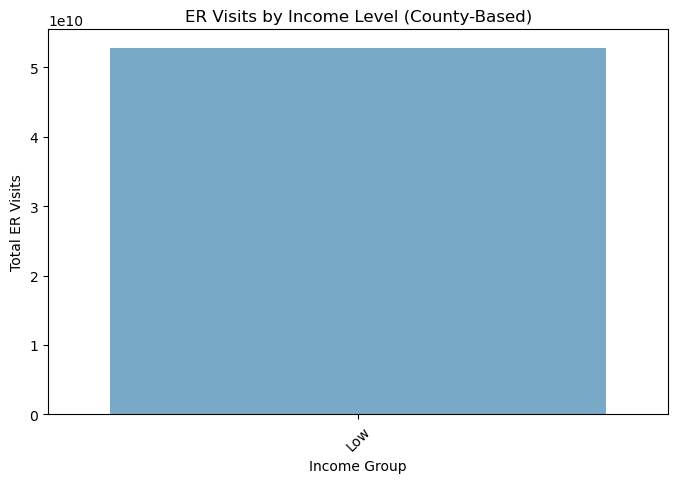

In [58]:
# Group by Income Group and count ER visits
income_grouped = merged_data.groupby("Income_Group")["count"].sum()

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=income_grouped.index, y=income_grouped.values, palette="Blues")
plt.xlabel("Income Group")
plt.ylabel("Total ER Visits")
plt.title("ER Visits by Income Level (County-Based)")
plt.xticks(rotation=45)
plt.show()


/var/folders/01/276kgpfd3vl01649sg75rmdr0000gn/T/ipykernel_9444/834433348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties.index, y=top_counties.values, palette="Reds")


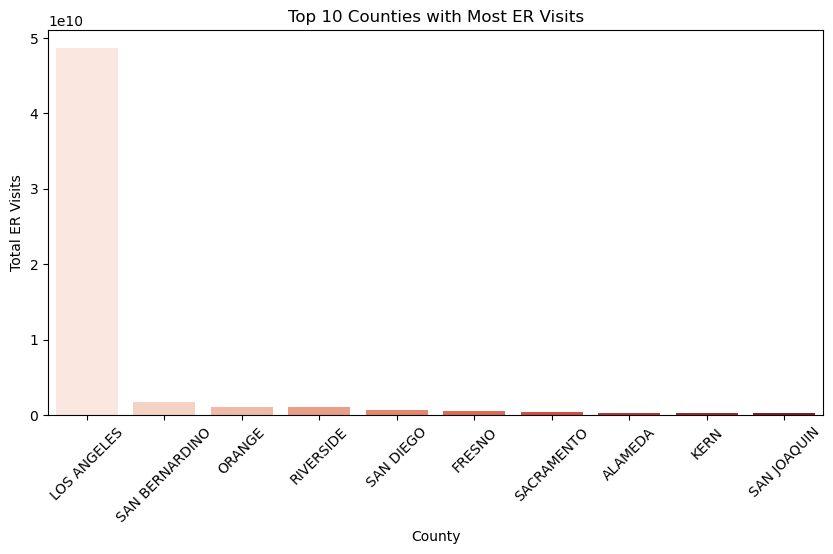

In [60]:
# Find top 10 counties with highest ER visits
top_counties = merged_data.groupby("county_name")["count"].sum().nlargest(10)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=top_counties.index, y=top_counties.values, palette="Reds")
plt.xlabel("County")
plt.ylabel("Total ER Visits")
plt.title("Top 10 Counties with Most ER Visits")
plt.xticks(rotation=45)
plt.show()
